In [ ]:
# https://www.kaggle.com/code/pr4nav101/phishing-website-detection-cnn-lstm

import numpy as np 
import pandas as pd 
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')

from keras import Sequential

import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn import tree
from colorama import Fore  #Colorama is a module to color the python outputs
from urllib.parse import urlparse

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from tld import get_tld, is_tld

# 現在我們可以建立我們的模型。我們將使用一個簡單的LSTM模型。
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

2024-04-07 15:36:17.226996: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
df = pd.read_csv('dataset_phishing.csv')
df.head(10)

In [ ]:
count_pos = df[df['result'] == 1].shape[0]
count_neg = df[df['result'] == 0].shape[0]
print(f"count_pos:{count_pos} count_neg:{count_neg}")

In [3]:
#label Encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['labels'] = le.fit_transform(df['status'])

In [4]:
df[['status','labels']].head(10)

,status,labels
0,legitimate,0
1,phishing,1
2,phishing,1
3,legitimate,0
4,legitimate,0
5,phishing,1
6,legitimate,0
7,phishing,1
8,legitimate,0
9,legitimate,0


In [5]:
Y1 = df['labels']
X1 = df.drop(columns = ['url','labels','status'])

In [6]:
X1.head(2)

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,37,19,0,3,0,0,0,0,0,0,...,0,0,1,0,45,-1,0,1,1,4
1,77,23,1,1,0,0,0,0,0,0,...,0,1,0,0,77,5767,0,0,1,2


In [7]:
Y1.head(2)

0    0
1    1
Name: labels, dtype: int64

In [8]:
#data for learning without features 

X2 = df['url']
X2.head(2)

0                http://www.crestonwood.com/router.php
1    http://shadetreetechnology.com/V4/validation/a...
Name: url, dtype: object

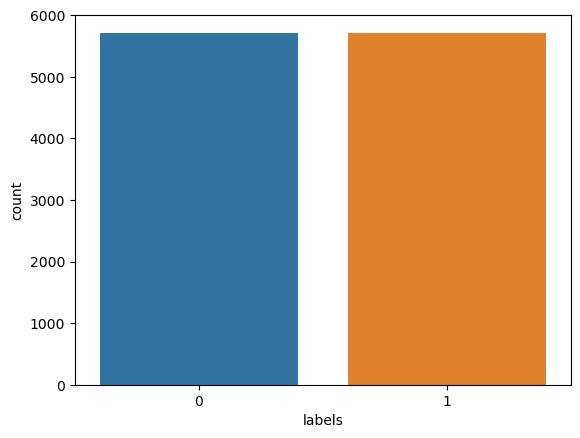

In [34]:
sns.countplot(x='labels', data=df);

<AxesSubplot:>

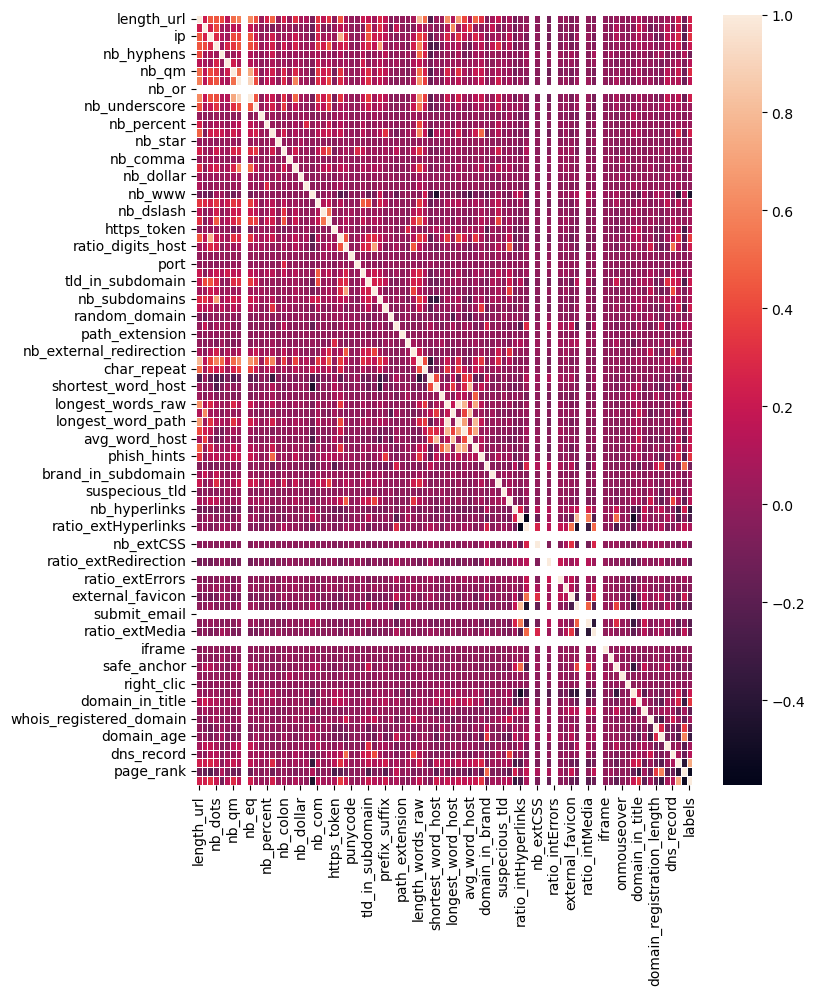

In [35]:
plt.figure(figsize=(8, 10))
sns.heatmap(df.corr(), linewidths=.5)

In [9]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X1,Y1,stratify = Y1,test_size = 0.2,random_state = 42)

In [10]:
X_train1 = np.expand_dims(X_train1, axis=-1)
X_test1 = np.expand_dims(X_test1, axis=-1)

X_train1.shape

(9144, 87, 1)

In [11]:
# CREATING DATASET WITHOUT PRIOR FEATURE EXTRACTION
ps = PorterStemmer()
corpus_train = []

def albumentations(X,corpus_t):
    for i in range(len(X)):
        print(i,"/",len(X))
        review = re.sub("[^a-zA-Z]"," ",X[i])
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if word not in set(stopwords.words("english"))] #TO REMOVE STOP WORDS LIKE THE, A ETC 
        review = " ".join(review)
        corpus_t.append(review)
albumentations(X2,corpus_train)

0 / 11430
1 / 11430
2 / 11430
3 / 11430
4 / 11430
5 / 11430
6 / 11430
7 / 11430
8 / 11430
9 / 11430
10 / 11430
11 / 11430
12 / 11430
13 / 11430
14 / 11430
15 / 11430
16 / 11430
17 / 11430
18 / 11430
19 / 11430
20 / 11430
21 / 11430
22 / 11430
23 / 11430
24 / 11430
25 / 11430
26 / 11430
27 / 11430
28 / 11430
29 / 11430
30 / 11430
31 / 11430
32 / 11430
33 / 11430
34 / 11430
35 / 11430
36 / 11430
37 / 11430
38 / 11430
39 / 11430
40 / 11430
41 / 11430
42 / 11430
43 / 11430
44 / 11430
45 / 11430
46 / 11430
47 / 11430
48 / 11430
49 / 11430
50 / 11430
51 / 11430
52 / 11430
53 / 11430
54 / 11430
55 / 11430
56 / 11430
57 / 11430
58 / 11430
59 / 11430
60 / 11430
61 / 11430
62 / 11430
63 / 11430
64 / 11430
65 / 11430
66 / 11430
67 / 11430
68 / 11430
69 / 11430
70 / 11430
71 / 11430
72 / 11430
73 / 11430
74 / 11430
75 / 11430
76 / 11430
77 / 11430
78 / 11430
79 / 11430
80 / 11430
81 / 11430
82 / 11430
83 / 11430
84 / 11430
85 / 11430
86 / 11430
87 / 11430
88 / 11430
89 / 11430
90 / 11430
91 / 1143

781 / 11430
782 / 11430
783 / 11430
784 / 11430
785 / 11430
786 / 11430
787 / 11430
788 / 11430
789 / 11430
790 / 11430
791 / 11430
792 / 11430
793 / 11430
794 / 11430
795 / 11430
796 / 11430
797 / 11430
798 / 11430
799 / 11430
800 / 11430
801 / 11430
802 / 11430
803 / 11430
804 / 11430
805 / 11430
806 / 11430
807 / 11430
808 / 11430
809 / 11430
810 / 11430
811 / 11430
812 / 11430
813 / 11430
814 / 11430
815 / 11430
816 / 11430
817 / 11430
818 / 11430
819 / 11430
820 / 11430
821 / 11430
822 / 11430
823 / 11430
824 / 11430
825 / 11430
826 / 11430
827 / 11430
828 / 11430
829 / 11430
830 / 11430
831 / 11430
832 / 11430
833 / 11430
834 / 11430
835 / 11430
836 / 11430
837 / 11430
838 / 11430
839 / 11430
840 / 11430
841 / 11430
842 / 11430
843 / 11430
844 / 11430
845 / 11430
846 / 11430
847 / 11430
848 / 11430
849 / 11430
850 / 11430
851 / 11430
852 / 11430
853 / 11430
854 / 11430
855 / 11430
856 / 11430
857 / 11430
858 / 11430
859 / 11430
860 / 11430
861 / 11430
862 / 11430
863 / 11430
864 

1456 / 11430
1457 / 11430
1458 / 11430
1459 / 11430
1460 / 11430
1461 / 11430
1462 / 11430
1463 / 11430
1464 / 11430
1465 / 11430
1466 / 11430
1467 / 11430
1468 / 11430
1469 / 11430
1470 / 11430
1471 / 11430
1472 / 11430
1473 / 11430
1474 / 11430
1475 / 11430
1476 / 11430
1477 / 11430
1478 / 11430
1479 / 11430
1480 / 11430
1481 / 11430
1482 / 11430
1483 / 11430
1484 / 11430
1485 / 11430
1486 / 11430
1487 / 11430
1488 / 11430
1489 / 11430
1490 / 11430
1491 / 11430
1492 / 11430
1493 / 11430
1494 / 11430
1495 / 11430
1496 / 11430
1497 / 11430
1498 / 11430
1499 / 11430
1500 / 11430
1501 / 11430
1502 / 11430
1503 / 11430
1504 / 11430
1505 / 11430
1506 / 11430
1507 / 11430
1508 / 11430
1509 / 11430
1510 / 11430
1511 / 11430
1512 / 11430
1513 / 11430
1514 / 11430
1515 / 11430
1516 / 11430
1517 / 11430
1518 / 11430
1519 / 11430
1520 / 11430
1521 / 11430
1522 / 11430
1523 / 11430
1524 / 11430
1525 / 11430
1526 / 11430
1527 / 11430
1528 / 11430
1529 / 11430
1530 / 11430
1531 / 11430
1532 / 11430

2100 / 11430
2101 / 11430
2102 / 11430
2103 / 11430
2104 / 11430
2105 / 11430
2106 / 11430
2107 / 11430
2108 / 11430
2109 / 11430
2110 / 11430
2111 / 11430
2112 / 11430
2113 / 11430
2114 / 11430
2115 / 11430
2116 / 11430
2117 / 11430
2118 / 11430
2119 / 11430
2120 / 11430
2121 / 11430
2122 / 11430
2123 / 11430
2124 / 11430
2125 / 11430
2126 / 11430
2127 / 11430
2128 / 11430
2129 / 11430
2130 / 11430
2131 / 11430
2132 / 11430
2133 / 11430
2134 / 11430
2135 / 11430
2136 / 11430
2137 / 11430
2138 / 11430
2139 / 11430
2140 / 11430
2141 / 11430
2142 / 11430
2143 / 11430
2144 / 11430
2145 / 11430
2146 / 11430
2147 / 11430
2148 / 11430
2149 / 11430
2150 / 11430
2151 / 11430
2152 / 11430
2153 / 11430
2154 / 11430
2155 / 11430
2156 / 11430
2157 / 11430
2158 / 11430
2159 / 11430
2160 / 11430
2161 / 11430
2162 / 11430
2163 / 11430
2164 / 11430
2165 / 11430
2166 / 11430
2167 / 11430
2168 / 11430
2169 / 11430
2170 / 11430
2171 / 11430
2172 / 11430
2173 / 11430
2174 / 11430
2175 / 11430
2176 / 11430

2834 / 11430
2835 / 11430
2836 / 11430
2837 / 11430
2838 / 11430
2839 / 11430
2840 / 11430
2841 / 11430
2842 / 11430
2843 / 11430
2844 / 11430
2845 / 11430
2846 / 11430
2847 / 11430
2848 / 11430
2849 / 11430
2850 / 11430
2851 / 11430
2852 / 11430
2853 / 11430
2854 / 11430
2855 / 11430
2856 / 11430
2857 / 11430
2858 / 11430
2859 / 11430
2860 / 11430
2861 / 11430
2862 / 11430
2863 / 11430
2864 / 11430
2865 / 11430
2866 / 11430
2867 / 11430
2868 / 11430
2869 / 11430
2870 / 11430
2871 / 11430
2872 / 11430
2873 / 11430
2874 / 11430
2875 / 11430
2876 / 11430
2877 / 11430
2878 / 11430
2879 / 11430
2880 / 11430
2881 / 11430
2882 / 11430
2883 / 11430
2884 / 11430
2885 / 11430
2886 / 11430
2887 / 11430
2888 / 11430
2889 / 11430
2890 / 11430
2891 / 11430
2892 / 11430
2893 / 11430
2894 / 11430
2895 / 11430
2896 / 11430
2897 / 11430
2898 / 11430
2899 / 11430
2900 / 11430
2901 / 11430
2902 / 11430
2903 / 11430
2904 / 11430
2905 / 11430
2906 / 11430
2907 / 11430
2908 / 11430
2909 / 11430
2910 / 11430

3581 / 11430
3582 / 11430
3583 / 11430
3584 / 11430
3585 / 11430
3586 / 11430
3587 / 11430
3588 / 11430
3589 / 11430
3590 / 11430
3591 / 11430
3592 / 11430
3593 / 11430
3594 / 11430
3595 / 11430
3596 / 11430
3597 / 11430
3598 / 11430
3599 / 11430
3600 / 11430
3601 / 11430
3602 / 11430
3603 / 11430
3604 / 11430
3605 / 11430
3606 / 11430
3607 / 11430
3608 / 11430
3609 / 11430
3610 / 11430
3611 / 11430
3612 / 11430
3613 / 11430
3614 / 11430
3615 / 11430
3616 / 11430
3617 / 11430
3618 / 11430
3619 / 11430
3620 / 11430
3621 / 11430
3622 / 11430
3623 / 11430
3624 / 11430
3625 / 11430
3626 / 11430
3627 / 11430
3628 / 11430
3629 / 11430
3630 / 11430
3631 / 11430
3632 / 11430
3633 / 11430
3634 / 11430
3635 / 11430
3636 / 11430
3637 / 11430
3638 / 11430
3639 / 11430
3640 / 11430
3641 / 11430
3642 / 11430
3643 / 11430
3644 / 11430
3645 / 11430
3646 / 11430
3647 / 11430
3648 / 11430
3649 / 11430
3650 / 11430
3651 / 11430
3652 / 11430
3653 / 11430
3654 / 11430
3655 / 11430
3656 / 11430
3657 / 11430

4263 / 11430
4264 / 11430
4265 / 11430
4266 / 11430
4267 / 11430
4268 / 11430
4269 / 11430
4270 / 11430
4271 / 11430
4272 / 11430
4273 / 11430
4274 / 11430
4275 / 11430
4276 / 11430
4277 / 11430
4278 / 11430
4279 / 11430
4280 / 11430
4281 / 11430
4282 / 11430
4283 / 11430
4284 / 11430
4285 / 11430
4286 / 11430
4287 / 11430
4288 / 11430
4289 / 11430
4290 / 11430
4291 / 11430
4292 / 11430
4293 / 11430
4294 / 11430
4295 / 11430
4296 / 11430
4297 / 11430
4298 / 11430
4299 / 11430
4300 / 11430
4301 / 11430
4302 / 11430
4303 / 11430
4304 / 11430
4305 / 11430
4306 / 11430
4307 / 11430
4308 / 11430
4309 / 11430
4310 / 11430
4311 / 11430
4312 / 11430
4313 / 11430
4314 / 11430
4315 / 11430
4316 / 11430
4317 / 11430
4318 / 11430
4319 / 11430
4320 / 11430
4321 / 11430
4322 / 11430
4323 / 11430
4324 / 11430
4325 / 11430
4326 / 11430
4327 / 11430
4328 / 11430
4329 / 11430
4330 / 11430
4331 / 11430
4332 / 11430
4333 / 11430
4334 / 11430
4335 / 11430
4336 / 11430
4337 / 11430
4338 / 11430
4339 / 11430

4990 / 11430
4991 / 11430
4992 / 11430
4993 / 11430
4994 / 11430
4995 / 11430
4996 / 11430
4997 / 11430
4998 / 11430
4999 / 11430
5000 / 11430
5001 / 11430
5002 / 11430
5003 / 11430
5004 / 11430
5005 / 11430
5006 / 11430
5007 / 11430
5008 / 11430
5009 / 11430
5010 / 11430
5011 / 11430
5012 / 11430
5013 / 11430
5014 / 11430
5015 / 11430
5016 / 11430
5017 / 11430
5018 / 11430
5019 / 11430
5020 / 11430
5021 / 11430
5022 / 11430
5023 / 11430
5024 / 11430
5025 / 11430
5026 / 11430
5027 / 11430
5028 / 11430
5029 / 11430
5030 / 11430
5031 / 11430
5032 / 11430
5033 / 11430
5034 / 11430
5035 / 11430
5036 / 11430
5037 / 11430
5038 / 11430
5039 / 11430
5040 / 11430
5041 / 11430
5042 / 11430
5043 / 11430
5044 / 11430
5045 / 11430
5046 / 11430
5047 / 11430
5048 / 11430
5049 / 11430
5050 / 11430
5051 / 11430
5052 / 11430
5053 / 11430
5054 / 11430
5055 / 11430
5056 / 11430
5057 / 11430
5058 / 11430
5059 / 11430
5060 / 11430
5061 / 11430
5062 / 11430
5063 / 11430
5064 / 11430
5065 / 11430
5066 / 11430

5671 / 11430
5672 / 11430
5673 / 11430
5674 / 11430
5675 / 11430
5676 / 11430
5677 / 11430
5678 / 11430
5679 / 11430
5680 / 11430
5681 / 11430
5682 / 11430
5683 / 11430
5684 / 11430
5685 / 11430
5686 / 11430
5687 / 11430
5688 / 11430
5689 / 11430
5690 / 11430
5691 / 11430
5692 / 11430
5693 / 11430
5694 / 11430
5695 / 11430
5696 / 11430
5697 / 11430
5698 / 11430
5699 / 11430
5700 / 11430
5701 / 11430
5702 / 11430
5703 / 11430
5704 / 11430
5705 / 11430
5706 / 11430
5707 / 11430
5708 / 11430
5709 / 11430
5710 / 11430
5711 / 11430
5712 / 11430
5713 / 11430
5714 / 11430
5715 / 11430
5716 / 11430
5717 / 11430
5718 / 11430
5719 / 11430
5720 / 11430
5721 / 11430
5722 / 11430
5723 / 11430
5724 / 11430
5725 / 11430
5726 / 11430
5727 / 11430
5728 / 11430
5729 / 11430
5730 / 11430
5731 / 11430
5732 / 11430
5733 / 11430
5734 / 11430
5735 / 11430
5736 / 11430
5737 / 11430
5738 / 11430
5739 / 11430
5740 / 11430
5741 / 11430
5742 / 11430
5743 / 11430
5744 / 11430
5745 / 11430
5746 / 11430
5747 / 11430

6416 / 11430
6417 / 11430
6418 / 11430
6419 / 11430
6420 / 11430
6421 / 11430
6422 / 11430
6423 / 11430
6424 / 11430
6425 / 11430
6426 / 11430
6427 / 11430
6428 / 11430
6429 / 11430
6430 / 11430
6431 / 11430
6432 / 11430
6433 / 11430
6434 / 11430
6435 / 11430
6436 / 11430
6437 / 11430
6438 / 11430
6439 / 11430
6440 / 11430
6441 / 11430
6442 / 11430
6443 / 11430
6444 / 11430
6445 / 11430
6446 / 11430
6447 / 11430
6448 / 11430
6449 / 11430
6450 / 11430
6451 / 11430
6452 / 11430
6453 / 11430
6454 / 11430
6455 / 11430
6456 / 11430
6457 / 11430
6458 / 11430
6459 / 11430
6460 / 11430
6461 / 11430
6462 / 11430
6463 / 11430
6464 / 11430
6465 / 11430
6466 / 11430
6467 / 11430
6468 / 11430
6469 / 11430
6470 / 11430
6471 / 11430
6472 / 11430
6473 / 11430
6474 / 11430
6475 / 11430
6476 / 11430
6477 / 11430
6478 / 11430
6479 / 11430
6480 / 11430
6481 / 11430
6482 / 11430
6483 / 11430
6484 / 11430
6485 / 11430
6486 / 11430
6487 / 11430
6488 / 11430
6489 / 11430
6490 / 11430
6491 / 11430
6492 / 11430

7179 / 11430
7180 / 11430
7181 / 11430
7182 / 11430
7183 / 11430
7184 / 11430
7185 / 11430
7186 / 11430
7187 / 11430
7188 / 11430
7189 / 11430
7190 / 11430
7191 / 11430
7192 / 11430
7193 / 11430
7194 / 11430
7195 / 11430
7196 / 11430
7197 / 11430
7198 / 11430
7199 / 11430
7200 / 11430
7201 / 11430
7202 / 11430
7203 / 11430
7204 / 11430
7205 / 11430
7206 / 11430
7207 / 11430
7208 / 11430
7209 / 11430
7210 / 11430
7211 / 11430
7212 / 11430
7213 / 11430
7214 / 11430
7215 / 11430
7216 / 11430
7217 / 11430
7218 / 11430
7219 / 11430
7220 / 11430
7221 / 11430
7222 / 11430
7223 / 11430
7224 / 11430
7225 / 11430
7226 / 11430
7227 / 11430
7228 / 11430
7229 / 11430
7230 / 11430
7231 / 11430
7232 / 11430
7233 / 11430
7234 / 11430
7235 / 11430
7236 / 11430
7237 / 11430
7238 / 11430
7239 / 11430
7240 / 11430
7241 / 11430
7242 / 11430
7243 / 11430
7244 / 11430
7245 / 11430
7246 / 11430
7247 / 11430
7248 / 11430
7249 / 11430
7250 / 11430
7251 / 11430
7252 / 11430
7253 / 11430
7254 / 11430
7255 / 11430

7834 / 11430
7835 / 11430
7836 / 11430
7837 / 11430
7838 / 11430
7839 / 11430
7840 / 11430
7841 / 11430
7842 / 11430
7843 / 11430
7844 / 11430
7845 / 11430
7846 / 11430
7847 / 11430
7848 / 11430
7849 / 11430
7850 / 11430
7851 / 11430
7852 / 11430
7853 / 11430
7854 / 11430
7855 / 11430
7856 / 11430
7857 / 11430
7858 / 11430
7859 / 11430
7860 / 11430
7861 / 11430
7862 / 11430
7863 / 11430
7864 / 11430
7865 / 11430
7866 / 11430
7867 / 11430
7868 / 11430
7869 / 11430
7870 / 11430
7871 / 11430
7872 / 11430
7873 / 11430
7874 / 11430
7875 / 11430
7876 / 11430
7877 / 11430
7878 / 11430
7879 / 11430
7880 / 11430
7881 / 11430
7882 / 11430
7883 / 11430
7884 / 11430
7885 / 11430
7886 / 11430
7887 / 11430
7888 / 11430
7889 / 11430
7890 / 11430
7891 / 11430
7892 / 11430
7893 / 11430
7894 / 11430
7895 / 11430
7896 / 11430
7897 / 11430
7898 / 11430
7899 / 11430
7900 / 11430
7901 / 11430
7902 / 11430
7903 / 11430
7904 / 11430
7905 / 11430
7906 / 11430
7907 / 11430
7908 / 11430
7909 / 11430
7910 / 11430

8573 / 11430
8574 / 11430
8575 / 11430
8576 / 11430
8577 / 11430
8578 / 11430
8579 / 11430
8580 / 11430
8581 / 11430
8582 / 11430
8583 / 11430
8584 / 11430
8585 / 11430
8586 / 11430
8587 / 11430
8588 / 11430
8589 / 11430
8590 / 11430
8591 / 11430
8592 / 11430
8593 / 11430
8594 / 11430
8595 / 11430
8596 / 11430
8597 / 11430
8598 / 11430
8599 / 11430
8600 / 11430
8601 / 11430
8602 / 11430
8603 / 11430
8604 / 11430
8605 / 11430
8606 / 11430
8607 / 11430
8608 / 11430
8609 / 11430
8610 / 11430
8611 / 11430
8612 / 11430
8613 / 11430
8614 / 11430
8615 / 11430
8616 / 11430
8617 / 11430
8618 / 11430
8619 / 11430
8620 / 11430
8621 / 11430
8622 / 11430
8623 / 11430
8624 / 11430
8625 / 11430
8626 / 11430
8627 / 11430
8628 / 11430
8629 / 11430
8630 / 11430
8631 / 11430
8632 / 11430
8633 / 11430
8634 / 11430
8635 / 11430
8636 / 11430
8637 / 11430
8638 / 11430
8639 / 11430
8640 / 11430
8641 / 11430
8642 / 11430
8643 / 11430
8644 / 11430
8645 / 11430
8646 / 11430
8647 / 11430
8648 / 11430
8649 / 11430

9278 / 11430
9279 / 11430
9280 / 11430
9281 / 11430
9282 / 11430
9283 / 11430
9284 / 11430
9285 / 11430
9286 / 11430
9287 / 11430
9288 / 11430
9289 / 11430
9290 / 11430
9291 / 11430
9292 / 11430
9293 / 11430
9294 / 11430
9295 / 11430
9296 / 11430
9297 / 11430
9298 / 11430
9299 / 11430
9300 / 11430
9301 / 11430
9302 / 11430
9303 / 11430
9304 / 11430
9305 / 11430
9306 / 11430
9307 / 11430
9308 / 11430
9309 / 11430
9310 / 11430
9311 / 11430
9312 / 11430
9313 / 11430
9314 / 11430
9315 / 11430
9316 / 11430
9317 / 11430
9318 / 11430
9319 / 11430
9320 / 11430
9321 / 11430
9322 / 11430
9323 / 11430
9324 / 11430
9325 / 11430
9326 / 11430
9327 / 11430
9328 / 11430
9329 / 11430
9330 / 11430
9331 / 11430
9332 / 11430
9333 / 11430
9334 / 11430
9335 / 11430
9336 / 11430
9337 / 11430
9338 / 11430
9339 / 11430
9340 / 11430
9341 / 11430
9342 / 11430
9343 / 11430
9344 / 11430
9345 / 11430
9346 / 11430
9347 / 11430
9348 / 11430
9349 / 11430
9350 / 11430
9351 / 11430
9352 / 11430
9353 / 11430
9354 / 11430

9943 / 11430
9944 / 11430
9945 / 11430
9946 / 11430
9947 / 11430
9948 / 11430
9949 / 11430
9950 / 11430
9951 / 11430
9952 / 11430
9953 / 11430
9954 / 11430
9955 / 11430
9956 / 11430
9957 / 11430
9958 / 11430
9959 / 11430
9960 / 11430
9961 / 11430
9962 / 11430
9963 / 11430
9964 / 11430
9965 / 11430
9966 / 11430
9967 / 11430
9968 / 11430
9969 / 11430
9970 / 11430
9971 / 11430
9972 / 11430
9973 / 11430
9974 / 11430
9975 / 11430
9976 / 11430
9977 / 11430
9978 / 11430
9979 / 11430
9980 / 11430
9981 / 11430
9982 / 11430
9983 / 11430
9984 / 11430
9985 / 11430
9986 / 11430
9987 / 11430
9988 / 11430
9989 / 11430
9990 / 11430
9991 / 11430
9992 / 11430
9993 / 11430
9994 / 11430
9995 / 11430
9996 / 11430
9997 / 11430
9998 / 11430
9999 / 11430
10000 / 11430
10001 / 11430
10002 / 11430
10003 / 11430
10004 / 11430
10005 / 11430
10006 / 11430
10007 / 11430
10008 / 11430
10009 / 11430
10010 / 11430
10011 / 11430
10012 / 11430
10013 / 11430
10014 / 11430
10015 / 11430
10016 / 11430
10017 / 11430
10018 /

10561 / 11430
10562 / 11430
10563 / 11430
10564 / 11430
10565 / 11430
10566 / 11430
10567 / 11430
10568 / 11430
10569 / 11430
10570 / 11430
10571 / 11430
10572 / 11430
10573 / 11430
10574 / 11430
10575 / 11430
10576 / 11430
10577 / 11430
10578 / 11430
10579 / 11430
10580 / 11430
10581 / 11430
10582 / 11430
10583 / 11430
10584 / 11430
10585 / 11430
10586 / 11430
10587 / 11430
10588 / 11430
10589 / 11430
10590 / 11430
10591 / 11430
10592 / 11430
10593 / 11430
10594 / 11430
10595 / 11430
10596 / 11430
10597 / 11430
10598 / 11430
10599 / 11430
10600 / 11430
10601 / 11430
10602 / 11430
10603 / 11430
10604 / 11430
10605 / 11430
10606 / 11430
10607 / 11430
10608 / 11430
10609 / 11430
10610 / 11430
10611 / 11430
10612 / 11430
10613 / 11430
10614 / 11430
10615 / 11430
10616 / 11430
10617 / 11430
10618 / 11430
10619 / 11430
10620 / 11430
10621 / 11430
10622 / 11430
10623 / 11430
10624 / 11430
10625 / 11430
10626 / 11430
10627 / 11430
10628 / 11430
10629 / 11430
10630 / 11430
10631 / 11430
10632 

11234 / 11430
11235 / 11430
11236 / 11430
11237 / 11430
11238 / 11430
11239 / 11430
11240 / 11430
11241 / 11430
11242 / 11430
11243 / 11430
11244 / 11430
11245 / 11430
11246 / 11430
11247 / 11430
11248 / 11430
11249 / 11430
11250 / 11430
11251 / 11430
11252 / 11430
11253 / 11430
11254 / 11430
11255 / 11430
11256 / 11430
11257 / 11430
11258 / 11430
11259 / 11430
11260 / 11430
11261 / 11430
11262 / 11430
11263 / 11430
11264 / 11430
11265 / 11430
11266 / 11430
11267 / 11430
11268 / 11430
11269 / 11430
11270 / 11430
11271 / 11430
11272 / 11430
11273 / 11430
11274 / 11430
11275 / 11430
11276 / 11430
11277 / 11430
11278 / 11430
11279 / 11430
11280 / 11430
11281 / 11430
11282 / 11430
11283 / 11430
11284 / 11430
11285 / 11430
11286 / 11430
11287 / 11430
11288 / 11430
11289 / 11430
11290 / 11430
11291 / 11430
11292 / 11430
11293 / 11430
11294 / 11430
11295 / 11430
11296 / 11430
11297 / 11430
11298 / 11430
11299 / 11430
11300 / 11430
11301 / 11430
11302 / 11430
11303 / 11430
11304 / 11430
11305 

In [12]:
cv =TfidfVectorizer(max_features = 1000)
X2 = cv.fit_transform(corpus_train).toarray()

In [13]:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X2,Y1,stratify = Y1,test_size = 0.2,random_state = 42)

In [14]:
X_train2 = np.expand_dims(X_train2, axis = -1)
X_test2 = np.expand_dims(X_test2, axis = -1)
print(X_train2.shape,Y_train2.shape)
print(X_test2.shape,Y_test2.shape)

(9144, 1000, 1) (9144,)
(2286, 1000, 1) (2286,)


In [15]:
input_size1 = X_train1[1].shape
input_size2 = X_train2[2].shape
input_size1,input_size2

((87, 1), (1000, 1))

In [16]:
# Evaluation Helper Functions
def eval_graph(results):

    acc = results.history['accuracy']
    val_acc = results.history['val_accuracy']
    epochs = range(len(acc))
    fig = plt.figure(figsize=(14,7))
    plt.plot(epochs,acc,'r',label="Training Accuracy")
    plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
    plt.legend(loc='upper left')
    plt.title("ACCURACY GRAPH")
    plt.show()
    
    loss = results.history['loss']
    val_loss = results.history['val_loss']
    epochs = range(len(loss))
    fig = plt.figure(figsize=(14,7))
    plt.plot(epochs,loss,'r',label="Training loss")
    plt.plot(epochs,val_loss,'b',label="Validation loss")
    plt.legend(loc='upper left')
    plt.title("LOSS GRAPH")
    plt.show()

In [17]:
def conf_matrix(X_test,Y_test,model):
    
    Y_pred = model.predict(X_test)
    Y_pred = Y_pred>0.5
    cm = confusion_matrix(Y_test,Y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap = plt.cm.YlGn)
    plt.title('CONFUSION MATRIX')
    plt.show()

In [18]:
# CNN MODEL
def CNN(input_size):
    model = keras.Sequential()
    model.add(layers.Input(input_size))
    model.add(layers.Conv1D(filters = 16,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 32,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 64,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 128,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 256,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(512,activation = 'relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1,activation = 'sigmoid'))
    
    return model

CNN_model1 = CNN(input_size1)
CNN_model2 = CNN(input_size2)
CNN_model1.summary()
CNN_model2.summary()

2024-03-10 00:45:00.070629: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 87, 16)            64        
                                                                 
 dropout (Dropout)           (None, 87, 16)            0         
                                                                 
 batch_normalization (BatchN  (None, 87, 16)           64        
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 44, 16)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 44, 32)            1568      
                                                                 
 dropout_1 (Dropout)         (None, 44, 32)            0

                                                                 
 dropout_13 (Dropout)        (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 4,328,417
Trainable params: 4,327,425
Non-trainable params: 992
_________________________________________________________________


In [19]:
# CNN MODEL ON FIRST DATASET
CNN_model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

callbacks = [tf.keras.callbacks.ModelCheckpoint('CNN_MODEL_ON_FEATURE_EXTRACTED.h5',verbose=1,save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=30,verbose=1)]
CNN_results_1 = CNN_model1.fit(X_train1,Y_train1,validation_split=0.2,batch_size=128,epochs=200,callbacks=callbacks)

Epoch 1/200
58/58 [==============================] - ETA: 0s - loss: 0.7922 - accuracy: 0.6104
Epoch 1: val_loss improved from inf to 0.70398, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 8s 99ms/step - loss: 0.7922 - accuracy: 0.6104 - val_loss: 0.7040 - val_accuracy: 0.5801
Epoch 2/200
57/58 [============================>.] - ETA: 0s - loss: 0.6888 - accuracy: 0.6641
Epoch 2: val_loss did not improve from 0.70398
58/58 [==============================] - 4s 66ms/step - loss: 0.6887 - accuracy: 0.6640 - val_loss: 0.7183 - val_accuracy: 0.5631
Epoch 3/200
58/58 [==============================] - ETA: 0s - loss: 0.6280 - accuracy: 0.6816
Epoch 3: val_loss improved from 0.70398 to 0.66056, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 3s 57ms/step - loss: 0.6280 - accuracy: 0.6816 - val_loss: 0.6606 - val_accuracy: 0.6047
Epoch 4/200
58/58 [==============================] - ETA: 0s - loss: 0.6016 - 

Epoch 30/200
57/58 [============================>.] - ETA: 0s - loss: 0.5502 - accuracy: 0.7470
Epoch 30: val_loss did not improve from 0.55079
58/58 [==============================] - 3s 57ms/step - loss: 0.5505 - accuracy: 0.7468 - val_loss: 1.4816 - val_accuracy: 0.5298
Epoch 31/200
58/58 [==============================] - ETA: 0s - loss: 0.5456 - accuracy: 0.7459
Epoch 31: val_loss did not improve from 0.55079
58/58 [==============================] - 3s 50ms/step - loss: 0.5456 - accuracy: 0.7459 - val_loss: 1.0217 - val_accuracy: 0.5254
Epoch 32/200
58/58 [==============================] - ETA: 0s - loss: 0.5485 - accuracy: 0.7496
Epoch 32: val_loss did not improve from 0.55079
58/58 [==============================] - 3s 49ms/step - loss: 0.5485 - accuracy: 0.7496 - val_loss: 1.0286 - val_accuracy: 0.5276
Epoch 33/200
57/58 [============================>.] - ETA: 0s - loss: 0.5472 - accuracy: 0.7436
Epoch 33: val_loss did not improve from 0.55079
58/58 [===========================

In [20]:
CNN_model1.evaluate(X_test1,Y_test1,verbose = 1)

72/72 [==============================] - 0s 5ms/step - loss: 1.1213 - accuracy: 0.5297


[1.1213278770446777, 0.5297462940216064]

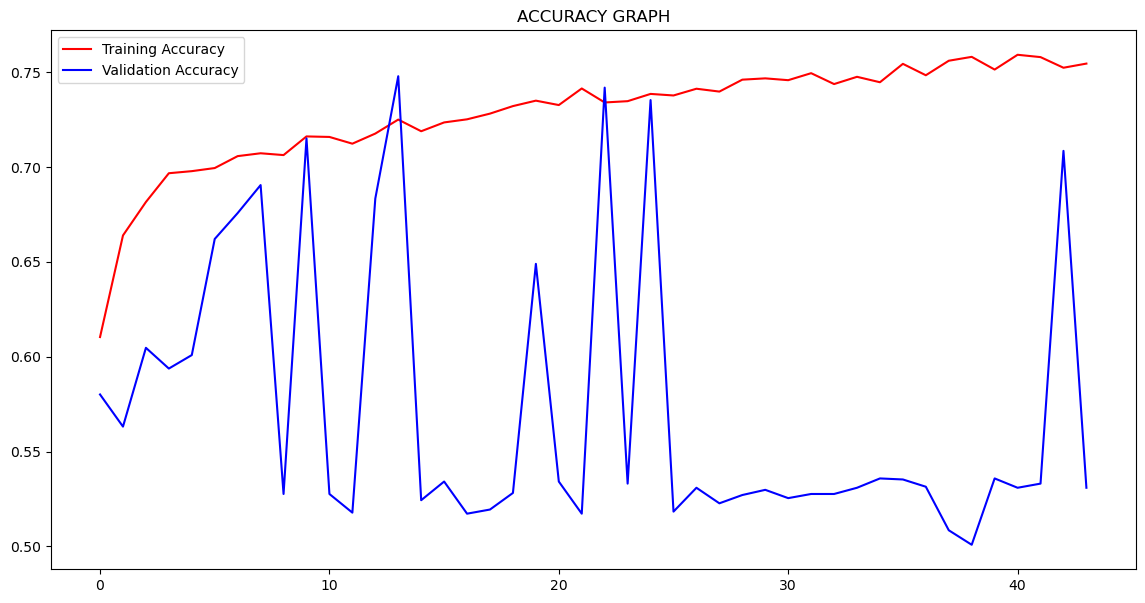

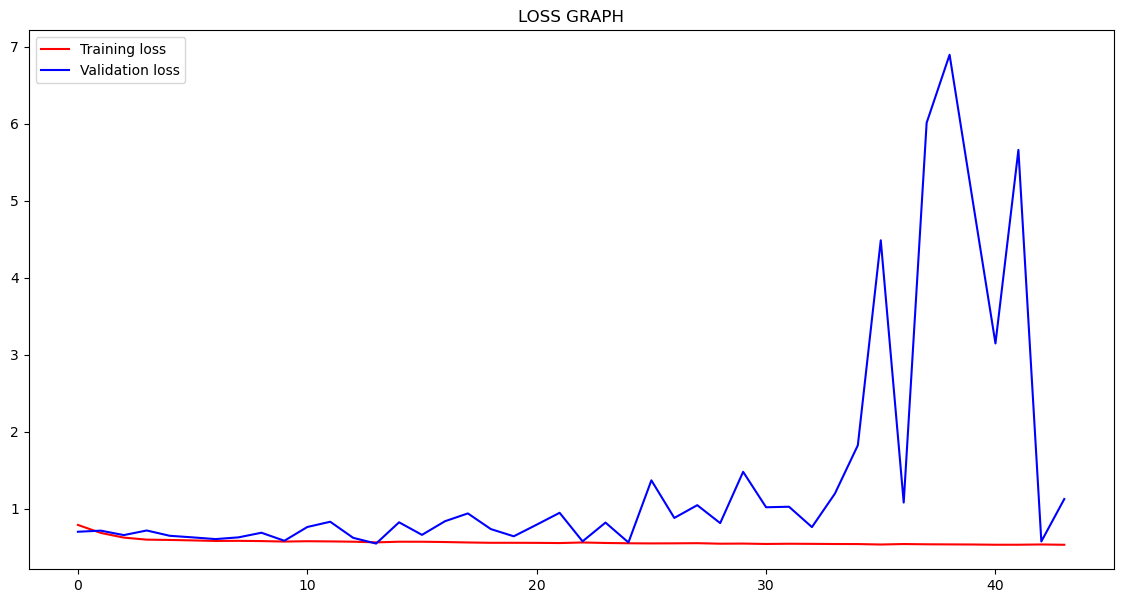

In [21]:
eval_graph(CNN_results_1)

In [22]:
Y_test1

6172    1
9810    1
8537    1
605     1
6549    0
       ..
4104    0
6374    0
6232    0
3950    0
8863    0
Name: labels, Length: 2286, dtype: int64

In [30]:
Y_test1

6172    1
9810    1
8537    1
605     1
6549    0
       ..
4104    0
6374    0
6232    0
3950    0
8863    0
Name: labels, Length: 2286, dtype: int64

72/72 [==============================] - 1s 4ms/step


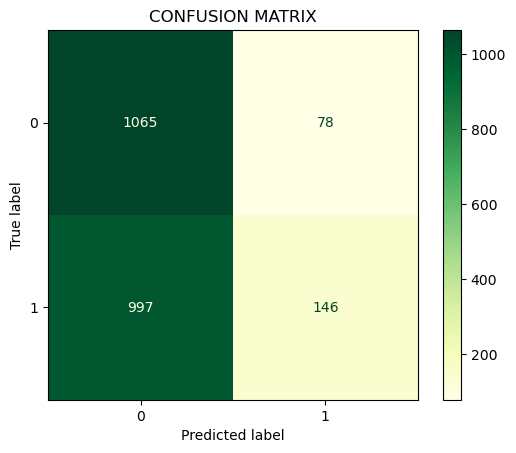

In [24]:
conf_matrix(X_test1,Y_test1,CNN_model1)

In [36]:
# CNN MODEL ON SECOND DATASET
CNN_model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

callbacks = [tf.keras.callbacks.ModelCheckpoint('CNN_MODEL_ON_NON_FEATURE_EXTRACTED.h5',verbose=1,save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=30,verbose=1)]
CNN_results_2 = CNN_model2.fit(X_train2,Y_train2,validation_split=0.2,batch_size=128,epochs=200,callbacks=callbacks)

Epoch 1/200
58/58 [==============================] - ETA: 0s - loss: 0.4778 - accuracy: 0.7855
Epoch 1: val_loss improved from inf to 0.68136, saving model to CNN_MODEL_ON_NON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 27s 413ms/step - loss: 0.4778 - accuracy: 0.7855 - val_loss: 0.6814 - val_accuracy: 0.5888
Epoch 2/200
58/58 [==============================] - ETA: 0s - loss: 0.4134 - accuracy: 0.8142
Epoch 2: val_loss improved from 0.68136 to 0.64988, saving model to CNN_MODEL_ON_NON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 22s 380ms/step - loss: 0.4134 - accuracy: 0.8142 - val_loss: 0.6499 - val_accuracy: 0.6648
Epoch 3/200
58/58 [==============================] - ETA: 0s - loss: 0.3668 - accuracy: 0.8420
Epoch 3: val_loss improved from 0.64988 to 0.64286, saving model to CNN_MODEL_ON_NON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 22s 385ms/step - loss: 0.3668 - accuracy: 0.8420 - val_loss: 0.6429 - val_accuracy: 0.6665
Epoch

58/58 [==============================] - 26s 443ms/step - loss: 0.1438 - accuracy: 0.9419 - val_loss: 0.2806 - val_accuracy: 0.9032
Epoch 29/200
58/58 [==============================] - ETA: 0s - loss: 0.1360 - accuracy: 0.9423
Epoch 29: val_loss did not improve from 0.25412
58/58 [==============================] - 24s 421ms/step - loss: 0.1360 - accuracy: 0.9423 - val_loss: 0.2774 - val_accuracy: 0.9049
Epoch 30/200
58/58 [==============================] - ETA: 0s - loss: 0.1399 - accuracy: 0.9429
Epoch 30: val_loss did not improve from 0.25412
58/58 [==============================] - 23s 397ms/step - loss: 0.1399 - accuracy: 0.9429 - val_loss: 0.2937 - val_accuracy: 0.9032
Epoch 31/200
58/58 [==============================] - ETA: 0s - loss: 0.1331 - accuracy: 0.9445
Epoch 31: val_loss did not improve from 0.25412
58/58 [==============================] - 23s 399ms/step - loss: 0.1331 - accuracy: 0.9445 - val_loss: 0.2825 - val_accuracy: 0.9021
Epoch 32/200
58/58 [====================

In [37]:
CNN_model2.evaluate(X_test2,Y_test2,verbose = 1)

72/72 [==============================] - 1s 17ms/step - loss: 0.3202 - accuracy: 0.9164


[0.32020696997642517, 0.9164479374885559]

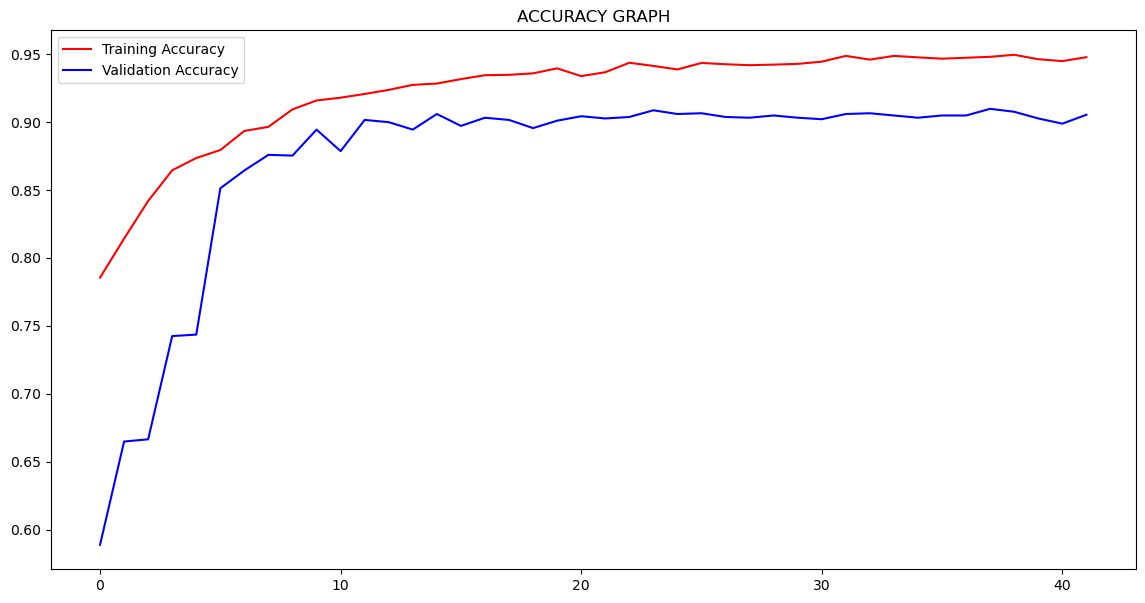

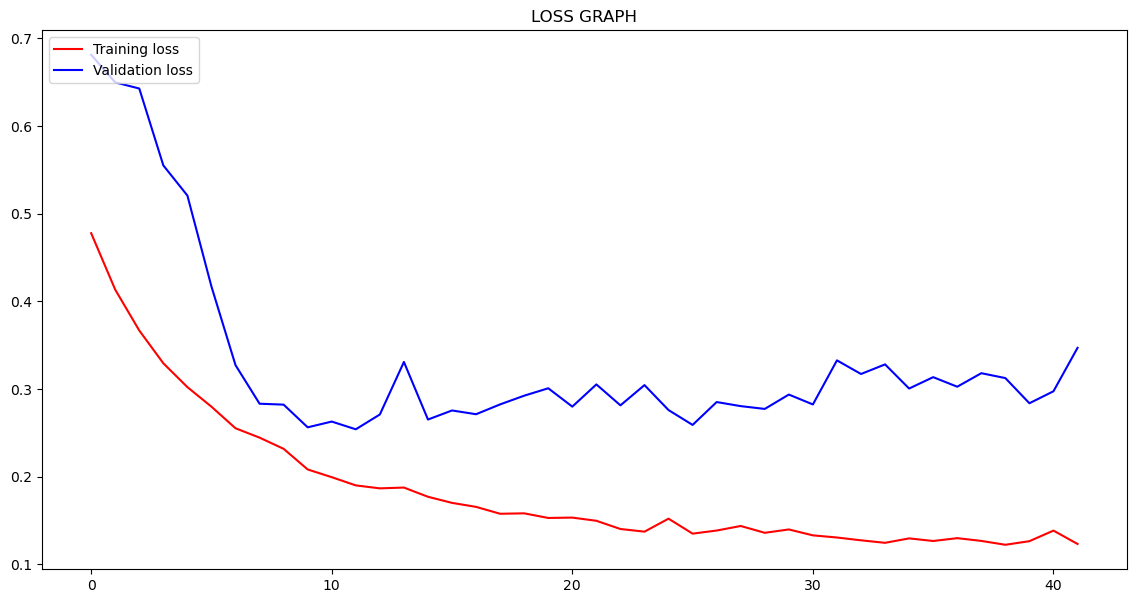

72/72 [==============================] - 2s 16ms/step


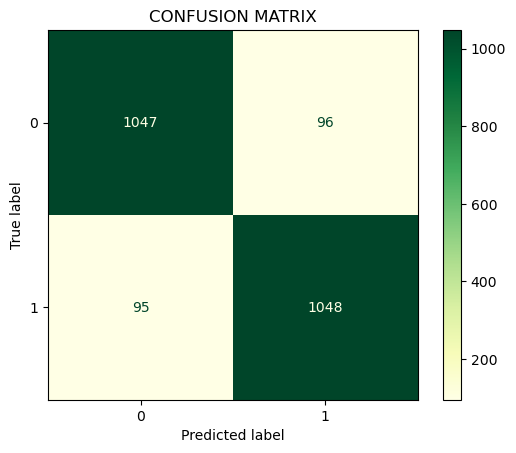

In [38]:
eval_graph(CNN_results_2)
conf_matrix(X_test2,Y_test2,CNN_model2)


In [39]:
# CNN LSTM MODEL
def CNN_LSTM(input_size):
    model = keras.Sequential()
    model.add(layers.Input(input_size))
    model.add(layers.Conv1D(filters = 16,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 32,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 64,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 128,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 256,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.LSTM(128,return_sequences=True))
    model.add(layers.Dropout(0.3))
    model.add(layers.Flatten())
    model.add(layers.Dense(128,activation = 'relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(128,activation = 'relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1,activation = 'sigmoid'))
    
    return model

CNN_LSTM_model1 = CNN_LSTM(input_size1)
CNN_LSTM_model1.summary()
CNN_LSTM_model2 = CNN_LSTM(input_size2)    
CNN_LSTM_model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 87, 16)            64        
                                                                 
 dropout_14 (Dropout)        (None, 87, 16)            0         
                                                                 
 batch_normalization_10 (Bat  (None, 87, 16)           64        
 chNormalization)                                                
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 44, 16)           0         
 g1D)                                                            
                                                                 
 conv1d_11 (Conv1D)          (None, 44, 32)            1568      
                                                                 
 dropout_15 (Dropout)        (None, 44, 32)           

                                                                 
 dense_7 (Dense)             (None, 128)               1032320   
                                                                 
 dropout_28 (Dropout)        (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dropout_29 (Dropout)        (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,379,169
Trainable params: 1,378,177
Non-trainable params: 992
_________________________________________________________________


In [40]:
# CNN_LSTM MODEL ON FIRST DATASET
CNN_LSTM_model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

callbacks = [tf.keras.callbacks.ModelCheckpoint('CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5',verbose=1,save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=30,verbose=1)]
CNN_LSTM_results_1 = CNN_LSTM_model1.fit(X_train1,Y_train1,validation_split=0.2,batch_size=128,epochs=200,callbacks=callbacks)

Epoch 1/200
57/58 [============================>.] - ETA: 0s - loss: 0.6413 - accuracy: 0.6198
Epoch 1: val_loss improved from inf to 0.70188, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 7s 65ms/step - loss: 0.6413 - accuracy: 0.6201 - val_loss: 0.7019 - val_accuracy: 0.5178
Epoch 2/200
57/58 [============================>.] - ETA: 0s - loss: 0.4984 - accuracy: 0.7640
Epoch 2: val_loss did not improve from 0.70188
58/58 [==============================] - 4s 63ms/step - loss: 0.4991 - accuracy: 0.7635 - val_loss: 0.7397 - val_accuracy: 0.5342
Epoch 3/200
57/58 [============================>.] - ETA: 0s - loss: 0.4545 - accuracy: 0.7948
Epoch 3: val_loss improved from 0.70188 to 0.70114, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 4s 67ms/step - loss: 0.4546 - accuracy: 0.7945 - val_loss: 0.7011 - val_accuracy: 0.5309
Epoch 4/200
57/58 [============================>.] - ETA: 0s - loss:

58/58 [==============================] - 4s 65ms/step - loss: 0.2592 - accuracy: 0.8919 - val_loss: 0.9591 - val_accuracy: 0.7266
Epoch 58/200
57/58 [============================>.] - ETA: 0s - loss: 0.2452 - accuracy: 0.9027
Epoch 58: val_loss did not improve from 0.26054
58/58 [==============================] - 4s 64ms/step - loss: 0.2453 - accuracy: 0.9028 - val_loss: 0.6632 - val_accuracy: 0.7660
Epoch 59/200
57/58 [============================>.] - ETA: 0s - loss: 0.2541 - accuracy: 0.9019
Epoch 59: val_loss did not improve from 0.26054
58/58 [==============================] - 4s 65ms/step - loss: 0.2537 - accuracy: 0.9021 - val_loss: 0.9297 - val_accuracy: 0.7091
Epoch 60/200
57/58 [============================>.] - ETA: 0s - loss: 0.2519 - accuracy: 0.8939
Epoch 60: val_loss did not improve from 0.26054
58/58 [==============================] - 4s 67ms/step - loss: 0.2523 - accuracy: 0.8936 - val_loss: 0.7552 - val_accuracy: 0.7436
Epoch 61/200
57/58 [============================

72/72 [==============================] - 1s 7ms/step - loss: 0.6324 - accuracy: 0.7297


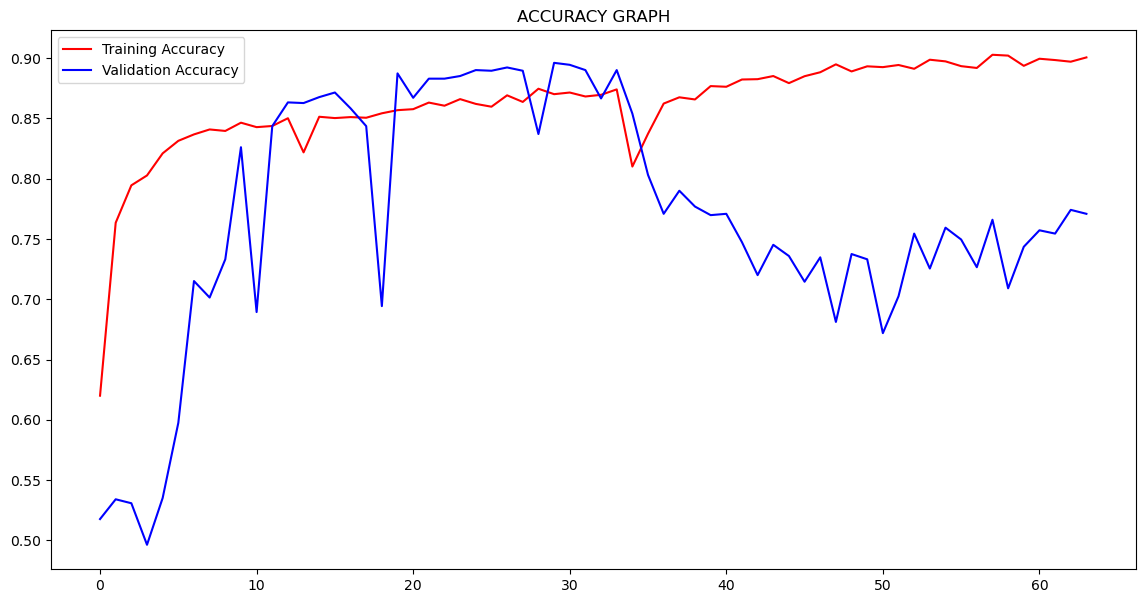

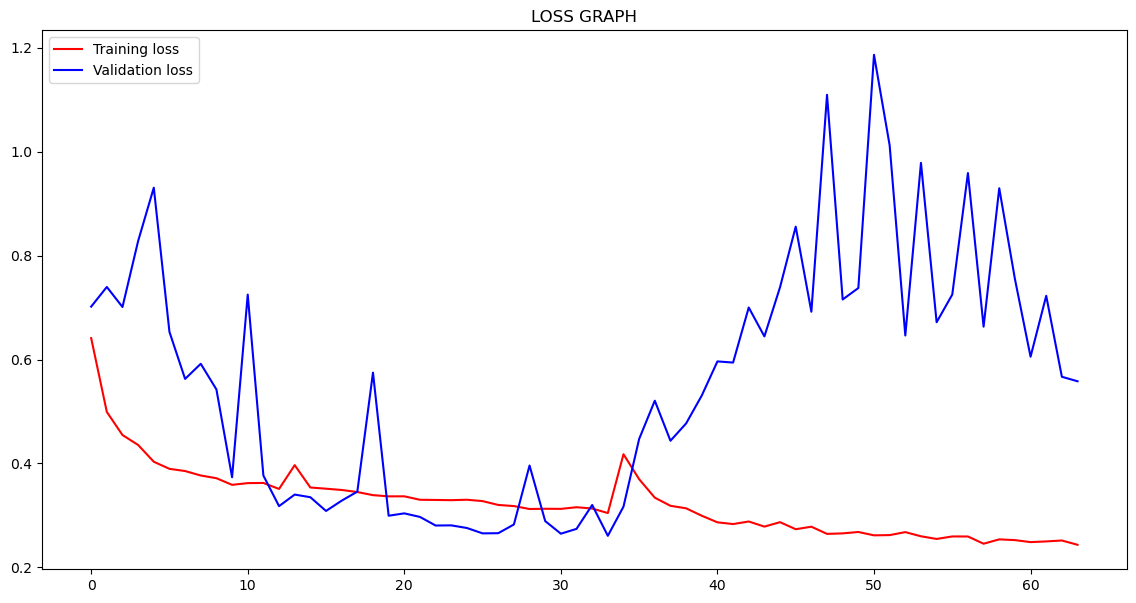

72/72 [==============================] - 1s 9ms/step


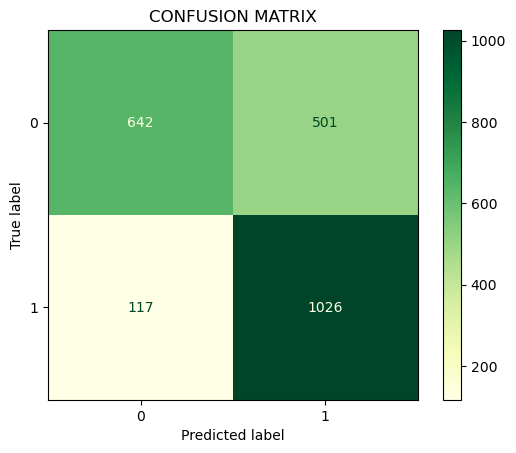

In [41]:
CNN_LSTM_model1.evaluate(X_test1,Y_test1)
eval_graph(CNN_LSTM_results_1)
conf_matrix(X_test1,Y_test1,CNN_LSTM_model1)

In [42]:
# CNN_LSTM MODEL ON SECOND DATASET
CNN_LSTM_model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

callbacks = [tf.keras.callbacks.ModelCheckpoint('CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.h5',verbose=1,save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=30,verbose=1)]
CNN_LSTM_results_2 = CNN_LSTM_model2.fit(X_train2,Y_train2,validation_split=0.2,batch_size=128,epochs=200,callbacks=callbacks)

Epoch 1/200
58/58 [==============================] - ETA: 0s - loss: 0.5398 - accuracy: 0.7259
Epoch 1: val_loss improved from inf to 0.71763, saving model to CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.h5
58/58 [==============================] - 37s 566ms/step - loss: 0.5398 - accuracy: 0.7259 - val_loss: 0.7176 - val_accuracy: 0.5036
Epoch 2/200
58/58 [==============================] - ETA: 0s - loss: 0.4315 - accuracy: 0.8089
Epoch 2: val_loss did not improve from 0.71763
58/58 [==============================] - 33s 562ms/step - loss: 0.4315 - accuracy: 0.8089 - val_loss: 0.7290 - val_accuracy: 0.5036
Epoch 3/200
58/58 [==============================] - ETA: 0s - loss: 0.3841 - accuracy: 0.8297
Epoch 3: val_loss did not improve from 0.71763
58/58 [==============================] - 33s 560ms/step - loss: 0.3841 - accuracy: 0.8297 - val_loss: 0.7810 - val_accuracy: 0.5036
Epoch 4/200
58/58 [==============================] - ETA: 0s - loss: 0.3495 - accuracy: 0.8487
Epoch 4: val_loss impro

72/72 [==============================] - 3s 37ms/step - loss: 0.3364 - accuracy: 0.9143


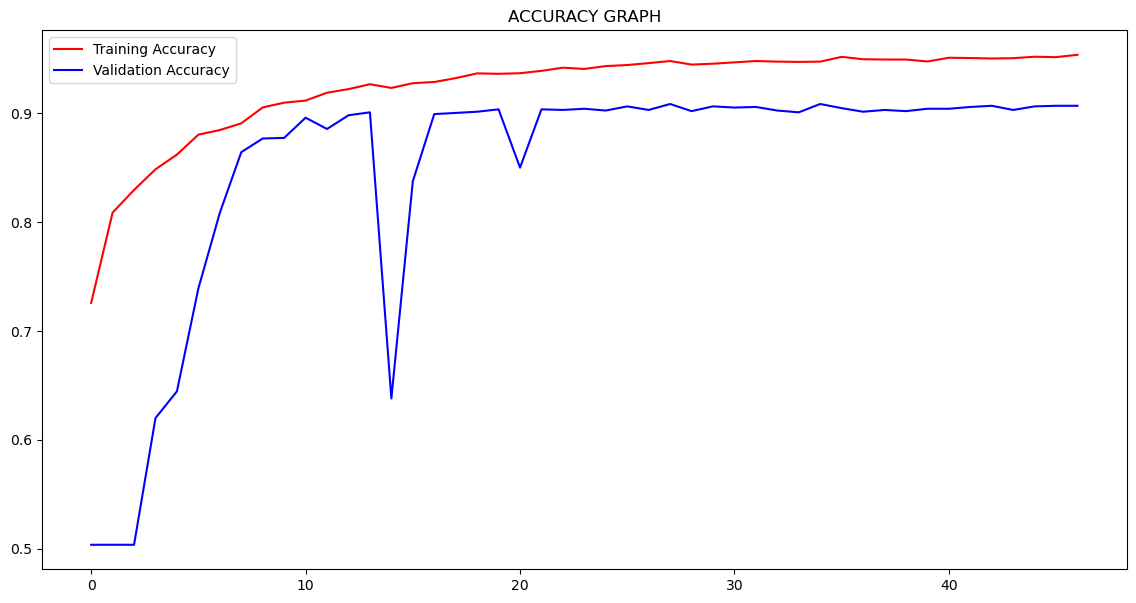

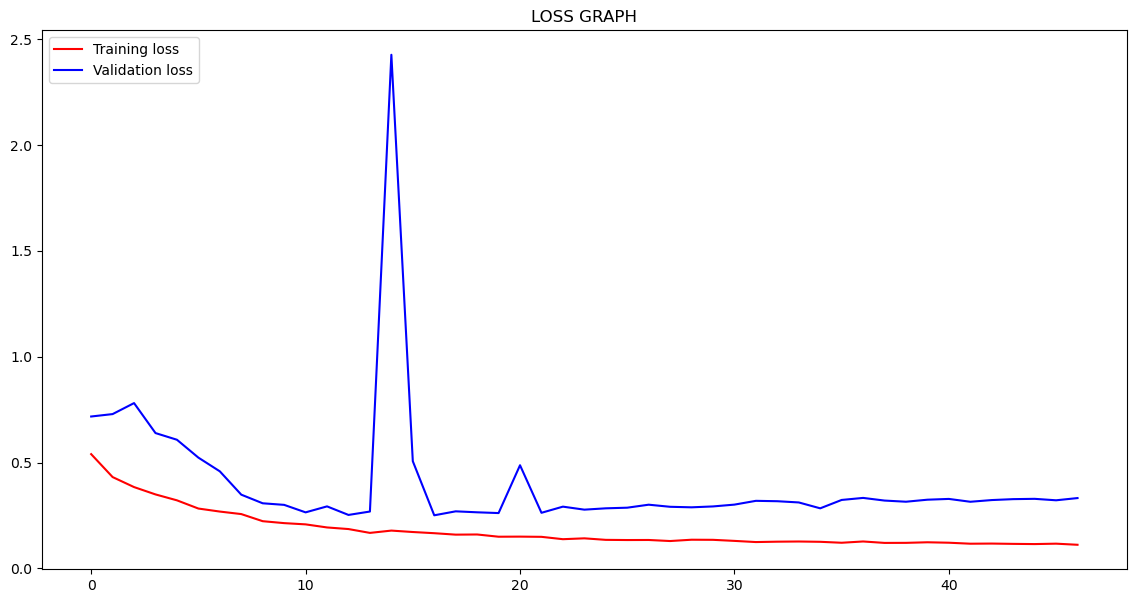

72/72 [==============================] - 3s 34ms/step


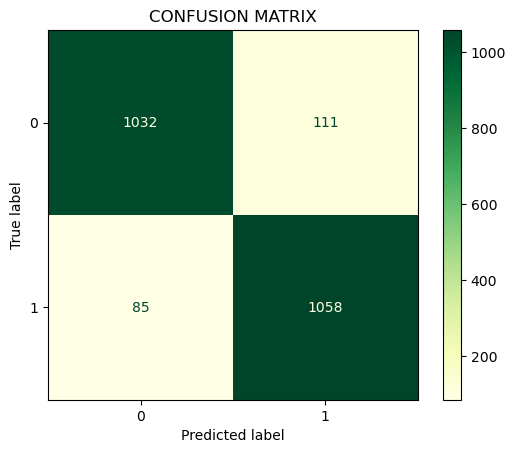

In [43]:
CNN_LSTM_model2.evaluate(X_test2,Y_test2)
eval_graph(CNN_LSTM_results_2)
conf_matrix(X_test2,Y_test2,CNN_LSTM_model2)

In [44]:
model_architecture = CNN_LSTM_model1.to_json()
with open('./modal/CNN_LSTM_urlv1_0.json', 'w') as json_file:
    json_file.write(model_architecture)

In [45]:
model_architecture = CNN_model1.to_json()
with open('./modal/CNN_urlv1_0.json', 'w') as json_file:
    json_file.write(model_architecture)

In [46]:
model_architecture = CNN_LSTM_model2.to_json()
with open('./modal/CNN_LSTM_2_urlv1_0.json', 'w') as json_file:
    json_file.write(model_architecture)

In [47]:
model_architecture = CNN_model2.to_json()
with open('./modal/CNN_2_urlv1_0.json', 'w') as json_file:
    json_file.write(model_architecture)